# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

**Answer: **

In the terminology of machine learning, classification [Statistical classification](https://en.wikipedia.org/wiki/Statistical_classification) is considered an instance of supervised learning, i.e. learning where a training set of correctly identified observations is available. The corresponding unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance. Based on the definition of classification we can clearly see that this supervised learning problem belongs to classification as our main task is to arrange the students in basically two categories: the students who need early intervention from the ones who are on the right track to graduate. The final goal is to identify the students who need early help so that they can successfuly graduate.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [4]:
# Import libraries
import numpy as np
import pandas as pd

In [18]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [24]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = len(student_data.index)
n_features = len(student_data.columns)-1
n_passed = len(student_data[(student_data["passed"]=="yes")])
n_failed = len(student_data[(student_data["passed"]=="no")])
grad_rate = float(n_passed) / float(n_passed+n_failed) * 100.0
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%

## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem,
as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`passed`) is the target or label we are trying to predict.

In [34]:
# Extract feature (X) and target (y) columns

# all columns but last are features:
feature_cols = list(student_data.columns[:-1])
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

# feature values for all students:
X_all = student_data[feature_cols]
# corresponding targets/labels: 
y_all = student_data[target_col].replace(['yes', 'no'], [1, 0])
print "\nFeature values:-"

# print the first 5 rows:
print X_all.head()  # print the first 5 rows

Feature column(s): ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed
Feature values: 
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher
1     GP   F   17       U     GT3       T     1     1  at_home     other
2     GP   F   15       U     LE3       T     1     1  at_home     other
3     GP   F   15       U     GT3       T     4     2   health  services
4     GP   F   16       U     GT3       T     3     3    other     other

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3
1   ...       yes      yes     

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [44]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
            # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data) # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U',
'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home',
'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime',
'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [59]:
from sklearn.cross_validation import StratifiedShuffleSplit

def strat_shuffle_split(features_data, target_data):
    #Shuffling data to avoid any ordering bias in the dataset

    num_size = 95
    sss = StratifiedShuffleSplit(target_data, test_size=num_size, n_iter = 50,random_state=42)

    for train_index, test_index in sss:
       X_train, X_test = features_data.iloc[train_index], features_data.iloc[test_index]
       y_train, y_test = target_data[train_index], target_data[test_index]

    return X_train, y_train, X_test, y_test

In [184]:
# First, decide how many training vs test samples you want
#num_all = student_data.shape[0]  # same as len(student_data)
#num_train = 300  # about 75% of the data
#num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the
#       dataset

features_data = X_all
target_data = y_all

#Stratified shuffle split
X_train, y_train, X_test, y_test = strat_shuffle_split(features_data, target_data)
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples

## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [78]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

# TODO: Choose a model, import it and instantiate an object
from sklearn.svm import SVC #for Model 1
SVM_clf = SVC()

# Fit model to training data
train_classifier(SVM_clf, X_train, y_train)  # note: using entire training set here
#print SVM_clf  # you can inspect the learned model by printing it

Training SVC...
Done!
Training time (secs): 0.057

In [101]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return f1_score(target.values, y_pred, pos_label=1)

train_f1_score = predict_labels(SVM_clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using SVC...
Done!
Prediction time (secs): 0.012
F1 score for training set: 0.851694915254

In [115]:
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(SVM_clf, X_test, y_test))

Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.829931972789

In [78]:
# TODO: Train and predict using two other models

#Model #2
# TODO: Choose a model, import it and instantiate an object
from sklearn.ensemble import RandomForestClassifier #for Model #2
RF_clf = RandomForestClassifier(n_estimators=15)

# Fit model to training data
train_classifier(RF_clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

train_f1_score = predict_labels(RF_clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(SVM_clf, X_test, y_test))

print "--------------------------------------"

#Model #3
# TODO: Choose a model, import it and instantiate an object
from sklearn.neighbors import KNeighborsClassifier #for Model 3
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=3),
max_samples=0.5, max_features=0.5)

# Fit model to training data
train_classifier(bagging_clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

train_f1_score = predict_labels(bagging_clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(SVM_clf, X_test, y_test))

Training RandomForestClassifier...
Done!
Training time (secs): 0.134
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.004
F1 score for training set: 1.0
Predicting labels using SVC...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.829931972789
--------------------------------------
Training BaggingClassifier...
Done!
Training time (secs): 0.052
Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.032
F1 score for training set: 0.864142538976
Predicting labels using SVC...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.829931972789

In [111]:
# Train and predict using different training set sizes
from sklearn.cross_validation import train_test_split

def train_predict(clf, X_train, y_train, X_test, y_test, grid=False):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

def split_data(X, y, num_train):
    #Split data according to num_train
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train)
    return X_train, y_train, X_test, y_test

# TODO: Run the helper function above for desired subsets of training data
def create_table(train_num, models, X, y):
    #loop
    for model_name, model in models.items():
        print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
        print "Testing Model " + model_name
        print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
        for size in train_num:
            # Split data
            X_train, y_train, X_test, y_test = split_data(X, y, size)
            train_predict(model, X_train[:size], y_train[:size], X_test, y_test, False)

# Note: Keep the test set constant

#With training sizes 100, 200, 300
train_num = [100, 200, 300]

#models
models = {"SVM classifier": SVM_clf, \
         "Randomized Forest": RF_clf, "Bagging Classifier with KNN": bagging_clf}

#create table
create_table(train_num, models, X_all, y_all)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Testing Model SVM classifier
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
------------------------------------------
Training set size: 100
Training SVC...
Done!
Training time (secs): 0.002
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.878048780488
Predicting labels using SVC...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.802494802495
------------------------------------------
Training set size: 200
Training SVC...
Done!
Training time (secs): 0.006
Predicting labels using SVC...
Done!
Prediction time (secs): 0.004
F1 score for training set: 0.879725085911
Predicting labels using SVC...
Done!
Prediction time (secs): 0.004
F1 score for test set: 0.84076433121
------------------------------------------
Training set size: 300
Training SVC...
Done!
Training time (secs): 0.011
Predicting labels using SVC...
Done!
Prediction time (secs): 0.008
F1 score for training set: 0.872570194384
Predi

**Model 1: **

- What are the general applications of this model? What are its strengths and weaknesses?
  * The general applications of SVM classifier (Testing Model) are that it can be applied to classification, anomalies detection, and regression problems. [SVM classifier](https://www.safaribooksonline.com/library/view/scala-for-machine/9781783558742/ch08s03.html)

  * The strengths of SVM classifier (Testing Model) are that it is accurate and less overfitting, robust to noise. [SVM strengths](http://condor.depaul.edu/ntomuro/courses/578/notes/SVM-overview.pdf)

 * The weaknesses of SVM classifier (Testing Model) are that it is computationally expensive, thus runs slow SVM. Also it is a binary classifier. To do a multi-class classification, pair-wise classifications can be used (one class against all others, for all classes). [SVM weaknesses](http://condor.depaul.edu/ntomuro/courses/578/notes/SVM-overview.pdf)


- Given what you know about the data so far, why did you choose this model to apply?
 * I chose the SVM classifier (Testing Model) to apply because I followed the logic of the Machine Learning scikit-learn diagram [ML scikit-learn diagram](http://scikit-learn.org/stable/tutorial/machine_learning_map/). Given that I count with less than 100k samples, that I am working with non text data, and that in the KNearest neighbors K-nearest neighbours the model can not be interpreted (there is no description of the learned concepts), I chose to work with the SVM nonlinear classifier. 


- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

In [214]:
#With training sizes 100, 200, 300
train_num = [100, 200, 300]

#models
models = {"SVM classifier": SVM_clf, \
         "Randomized Forest": RF_clf, "Bagging Classifier with KNN": bagging_clf}

#create table
create_table(train_num, models, X_all, y_all)

#Below I am only showing the table from the Model #1 (SVM classifier)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Testing Model SVM classifier
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
------------------------------------------
Training set size: 100
Training SVC...
Done!
Training time (secs): 0.002
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.878048780488
Predicting labels using SVC...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.802494802495
------------------------------------------
Training set size: 200
Training SVC...
Done!
Training time (secs): 0.006
Predicting labels using SVC...
Done!
Prediction time (secs): 0.004
F1 score for training set: 0.879725085911
Predicting labels using SVC...
Done!
Prediction time (secs): 0.004
F1 score for test set: 0.84076433121
------------------------------------------
Training set size: 300
Training SVC...
Done!
Training time (secs): 0.011
Predicting labels using SVC...
Done!
Prediction time (secs): 0.008
F1 score for training set: 0.872570194384
Predi

**Model 2: **

- What are the general applications of this model? What are its strengths and weaknesses?
  * The general applications of RandomForestClassifier (Testing Model) are for complex classification tasks.

  * The [strengths of RandomForestClassifier](http://www.alglib.net/dataanalysis/decisionforest.php#header1) (Testing Model) are: 

    -High training speed

    -Noniterative training: the algorithm is completed at a fixed number of operations

    -Scalability (capacity for processing large data volumes)

    -High quality of the models derived (comparable with neural networks and neural network ensembles)

    -Small quantity of parameters to be adjusted

    -Internal estimate of the model's generalization error

  * The [weaknesses of RandomForestClassifier](http://www.alglib.net/dataanalysis/decisionforest.php#header1) (Testing Model) are: 

    -The built model takes a large memory capacity. If a committee is set up of K trees based on a training set of the dimension N, then memory requirements will amount to O(K·N). For example, with K=100 and N=1000, the model built by the ALGLIB will have a size about one megabyte.

    -The trained model works somewhat slower than other algorithms (if 100 trees are incorporated into the model, then we should go over all of them, to get a result).

    -The algorithm is prone to overfitting, especially when used on a noisy task. This problem can partly be overcome by adjusting the parameter r (see below). A similar, only more apparent, problem is encountered in the original Random Forest algorithm (See Machine Learning Benchmarks and Random Forest Regression). It should be noted that its authors failed to notice this disadvantage, believing that the algorithm had no tendency to overfit, and some practitioners and theoreticians in machine learning share that wrong belief.

    -Similar to decision trees, the algorithm has absolutely no capacity for extrapolation.


- Given what you know about the data so far, why did you choose this model to apply?
  * I chose the SVM RandomForestClassifier (Testing Model) to apply because of its high training speed and the small quantity of parameters to be adjusted


- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

In [214]:
#With training sizes 100, 200, 300
train_num = [100, 200, 300]

#models
models = {"SVM classifier": SVM_clf, \
         "Randomized Forest": RF_clf, "Bagging Classifier with KNN": bagging_clf}

#create table
create_table(train_num, models, X_all, y_all)

#Below is Model #2 (Random Forest classifier)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Testing Model Randomized Forest
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
------------------------------------------
Training set size: 100
Training RandomForestClassifier...
Done!
Training time (secs): 0.064
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.003
F1 score for training set: 0.992125984252
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.755980861244
------------------------------------------
Training set size: 200
Training RandomForestClassifier...
Done!
Training time (secs): 0.067
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.003
F1 score for training set: 0.992592592593
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.766550522648
------------------------------------------
Training set size: 300
Training RandomForestClassifier...
Done!
Train

**Model 3: **

- What are the general applications of this model? What are its strengths and weaknesses?

  * The general applications of Bagging Classifier with KNN (Testing Model) are for decision tree methods, although it can be used with any type of method.

  * The strengths of Bagging Classifier with KNN (Testing Model) are that it helps to avoid overfitting and reduces variance.

  * The weaknesses of Bagging Classifier with KNN (Testing Model) are the loss of simplicity [weakness#1](https://uni-obuda.hu/journal/Machova_Barcak_Bednar_6.pdf) and that it can mildly degrade the performance of stable methods such as K-nearest neighbors (Breiman, 1996) [weakness#2](https://en.wikipedia.org/wiki/Bootstrap_aggregating)


- Given what you know about the data so far, why did you choose this model to apply?
  * I chose the Bagging Classifier with KNN (Testing Model) to apply because it reduces variance and helps to avoid overfitting. I had not considered that it is mostly used for artificial neural networks, classification and regression trees, and subset selection in linear regression.


- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.


Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

In [214]:
#With training sizes 100, 200, 300
train_num = [100, 200, 300]

#models
models = {"SVM classifier": SVM_clf, \
         "Randomized Forest": RF_clf, "Bagging Classifier with KNN": bagging_clf}

#create table
create_table(train_num, models, X_all, y_all)

#Below is Model #3 (Bagging Classifier with KNN)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Testing Model Bagging Classifier with KNN
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
------------------------------------------
Training set size: 100
Training BaggingClassifier...
Done!
Training time (secs): 0.036
Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.010
F1 score for training set: 0.842767295597
Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.018
F1 score for test set: 0.805970149254
------------------------------------------
Training set size: 200
Training BaggingClassifier...
Done!
Training time (secs): 0.037
Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.018
F1 score for training set: 0.860927152318
Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.018
F1 score for test set: 0.766666666667
------------------------------------------
Training set size: 300
Training BaggingClassifier...
Done!
Training time (secs): 0.036
Pr

## 5. Choosing the Best Model

1. Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
2. In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
3. Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
4. What is the model's final F<sub>1</sub> score?

**Answer: **

**1. **
 Based on the available data, limited resources, cost, and performance I chose "Support Vector Classification" or "SVM" as the best model. I followed the logic of the Machine Learning scikit-learn diagram [ML scikit-learn diagram](http://scikit-learn.org/stable/tutorial/machine_learning_map/). Given that I count with less than 100k samples, that I am working with non text data, and that SVM classification is known to be more accurate than Decision Tree classification. [SVM classification](http://web.stanford.edu/dept/itss/docs/oracle/10g/text.101/b10729/classify.htm#i1007173). I also discared the Bagging classifier because it is mostly used for artificial neural networks, classification, regression trees, and subset selection in linear regression [Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating). Of course I also discared the linear SVC because compared to the nonlinear SVC, the linear SVC tends to return an underfit model [linear SVC](http://scikit-learn.org/stable/modules/svm.html#classification). In the end following the logic of the diagram I was lead to work with the non linear SVM model.

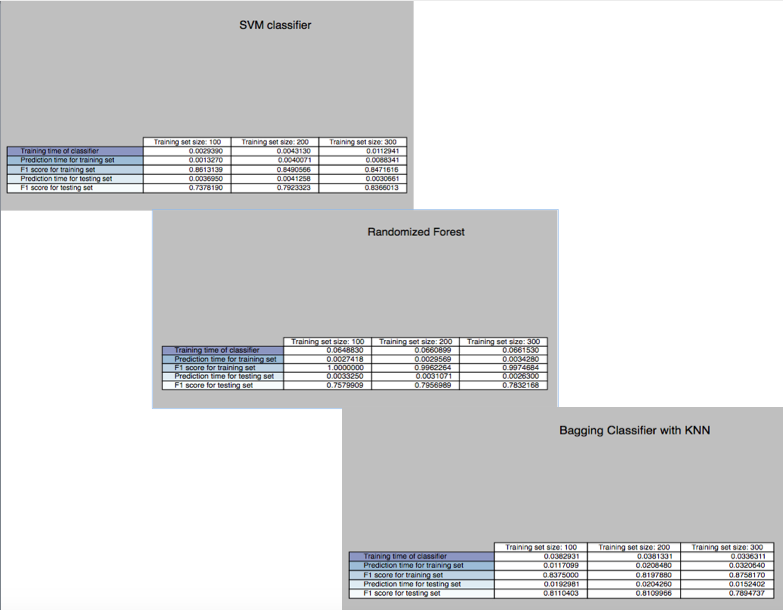

In [312]:
#Refer to Line 312 from student_intervention_Edited.py

#train_num = [100, 200, 300] #training sizes

#models = {"SVM classifier": SVM_clf, "Randomized Forest": RF_clf, "Bagging Classifier with KNN": bagging_clf}

all_tables(models, train_num, X, y)

#Below are all the tables from all the Models

**2. **
How SVM works: SVM/SVC uses the kernel technique to transform the data and based on these complex transformations SVC figures out how to seperate the data based on defined labels or outputs. [more about SVC](http://www.yaksis.com/posts/why-use-svm.html)

**3. **

In [225]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV

def fine_tuning_SVM(parameters, SVM_clf, features_data, target_data):
    # Fine-tuning SVM model
    final_svm_clf = GridSearchCV(SVM_clf, parameters, scoring='f1')
    print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
    print "Fine-tuning SVM-model: "
    print "%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
    X_train, y_train, X_test, y_test = strat_shuffle_split(features_data, target_data)
    train_predict(final_svm_clf, X_train, y_train, X_test, y_test, grid=True)
    print "Best parameters for the final tuned SVM model: " + str(final_svm_clf.best_params_)

#parameters
parameters = {'kernel':('linear','rbf', 'poly','sigmoid'), 'C':[1, 50], 'degree':[3,6]}

#Fine-tuning SVM model
fine_tuning_SVM(parameters, SVM_clf, features_data, target_data)
print "Finished"

%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Fine-tuning SVM-model: 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%
------------------------------------------
Training set size: 300
Training GridSearchCV...
Done!
Training time (secs): 15.105
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.006
F1 score for training set: 0.802395209581
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.805031446541
Best parameters for the final tuned SVM model: {'kernel': 'sigmoid', 'C': 1, 'degree': 3}
Finished

**4. **
    The F1 score for training set: 0.802395209581
    and The F1 score for test set: 0.805031446541

Note: an **F1 score** reaches its **best value** at **1** and worst at **0**.

*Additional information: [Graph of classifiers](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)